<br/>
<br/>
<br/>
<br/>
<center><b><span style="font-size:2.7em">Crypto Trading and<br/> <br/>Arbitrage Identification Strategies</span></b></center> 
<br/>
<center><b><span style="font-size:1.em">February 25th @ Weiberwirtschaft Berlin</span></b></center> 
<br/>
<img src="https://3mgj4y44nc15fnv8d303d8zb-wpengine.netdna-ssl.com/wp-content/uploads/2018/06/celo-696x449.jpg" align="center" style="width:40%"/>
<center>Questions? Contact: <a href="roman@celo.org">roman@celo.org</a></center>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representations-of-a-Market" data-toc-modified-id="Representations-of-a-Market-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representations of a Market</a></span><ul class="toc-item"><li><span><a href="#Exchange-Rate-Matrix-Representation" data-toc-modified-id="Exchange-Rate-Matrix-Representation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exchange Rate Matrix Representation</a></span></li><li><span><a href="#Directed-Graph-Representation" data-toc-modified-id="Directed-Graph-Representation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Directed Graph Representation</a></span></li><li><span><a href="#Log-Transformed-Representations" data-toc-modified-id="Log-Transformed-Representations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Log-Transformed Representations</a></span></li></ul></li><li><span><a href="#Identifying-Arbitrage-Cycles" data-toc-modified-id="Identifying-Arbitrage-Cycles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Identifying Arbitrage Cycles</a></span><ul class="toc-item"><li><span><a href="#Finding-an-Arbitrage-Cycle-with-Bellman-Ford" data-toc-modified-id="Finding-an-Arbitrage-Cycle-with-Bellman-Ford-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Finding an Arbitrage Cycle with Bellman-Ford</a></span></li><li><span><a href="#Finding-an-&quot;Optimal&quot;-Set-of-Cycles" data-toc-modified-id="Finding-an-&quot;Optimal&quot;-Set-of-Cycles-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Finding an "Optimal" Set of Cycles</a></span></li><li><span><a href="#Beyond-Arbitrage-Cycles---Maximize-wrt.-Quantities-(EXPERIMENTAL!)" data-toc-modified-id="Beyond-Arbitrage-Cycles---Maximize-wrt.-Quantities-(EXPERIMENTAL!)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Beyond Arbitrage Cycles - Maximize wrt. Quantities (EXPERIMENTAL!)</a></span></li></ul></li><li><span><a href="#Live-Arbitrage-Identification" data-toc-modified-id="Live-Arbitrage-Identification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Live Arbitrage Identification</a></span></li><li><span><a href="#Practical-Challenges-of-Arbitrage-Trading" data-toc-modified-id="Practical-Challenges-of-Arbitrage-Trading-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Practical Challenges of Arbitrage Trading</a></span></li></ul></div>

# Representations of a Market

Assume that there is a market with $N$ currencies. Also assume for simplicity that every possible pair can be traded (not a necessary assumption for the depicted representations). The exchange rates can be displayed by a source-to-target exchange rate matrix. Let us generate and analyze an exemplary such matrix and translate it into a graph representation.

In [1]:
# set things up and create button

Button(description='New Example', style=ButtonStyle())

In [2]:
# set some parameters, generate exchange rate matrix and the corresponding graph
N = 6 # number of currencies
max_spread_pct = 0.05 # maximum bid-ask spread in pct of bid, 0.05 for 5%

## Exchange Rate Matrix Representation

The exchange rate matrix takes the current best bids and best asks in the market and generates a matrix of multipliers that shows how many units of the target currency one would receive for a unit of the source currency.

In [3]:
# generate and display random exchange rate matrix  

target                               
              0      1     2     3     4     5
source 0   1.00   0.24  0.41  0.67  0.48  0.43
       1   3.91   1.00  0.07  0.50  0.19  0.22
       2   2.44  14.21  1.00  0.87  0.38  0.12
       3   1.49   2.00  1.12  1.00  0.13  0.14
       4   2.08   5.27  2.50  7.42  1.00  0.56
       5   2.24   4.40  8.43  7.15  1.80  1.00

## Directed Graph Representation

The above exchange rate matrix can be translated into a directed graph with nodes representing the currencies and the edge weights set to the exchange rate matrix multipliers.

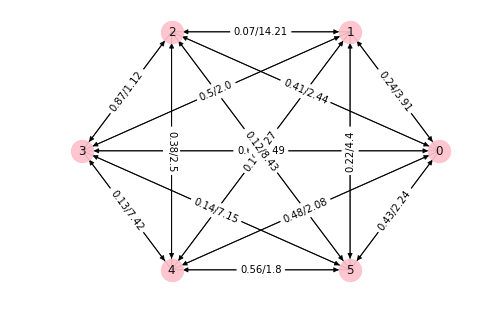

In [4]:
# display corresponding directed graph

An arbitrage is a cylce for which the **cumulative product** of the edge weights in an exchange rate graph is bigger than one. 

## Log-Transformed Representations

There are many well known graph algorithms that deal with cycle lengths - the **cumulative sum** of the edge weights. Fortunately, one can easily translate a cumulative product optimization problem into a convex cumulative sum optimzation problem by taking logs. To see this, note that for $a>0<b$
\begin{align}
ln\left(a\times b \right) = ln\left(a\right) + ln\left(b\right)
\end{align}

while noting that
\begin{align}
ln\left(x\right) \quad \text{is a positive and monotonic transformation.}
\end{align}

If we multiply everything with -1, convex maximization becomes convex minimization... Let us transform the above exchange rate matrix and the corresponding graph by taking negative logs.


Taking negative logs...


target                                                        
                  0           1          2          3          4          5
source 0   -ln(1.0)   -ln(0.24)  -ln(0.41)  -ln(0.67)  -ln(0.48)  -ln(0.43)
       1  -ln(3.91)    -ln(1.0)  -ln(0.07)   -ln(0.5)  -ln(0.19)  -ln(0.22)
       2  -ln(2.44)  -ln(14.21)   -ln(1.0)  -ln(0.87)  -ln(0.38)  -ln(0.12)
       3  -ln(1.49)    -ln(2.0)  -ln(1.12)   -ln(1.0)  -ln(0.13)  -ln(0.14)
       4  -ln(2.08)   -ln(5.27)   -ln(2.5)  -ln(7.42)   -ln(1.0)  -ln(0.56)
       5  -ln(2.24)    -ln(4.4)  -ln(8.43)  -ln(7.15)   -ln(1.8)   -ln(1.0)



...results in:


target                                                  
                 0         1         2         3         4         5
source 0  0.000000  1.427116  0.891598  0.400478  0.733969  0.843970
       1 -1.363537  0.000000  2.659260  0.693147  1.660731  1.514128
       2 -0.891998 -2.653946  0.000000  0.139262  0.967584  2.120264
       3 -0.398776 -0.693147 -0.113329  0.000000  2.040221  1.966113
       4 -0.732368 -1.662030 -0.916291 -2.004179  0.000000  0.579818
       5 -0.806476 -1.481605 -2.131797 -1.967112 -0.587787  0.000000

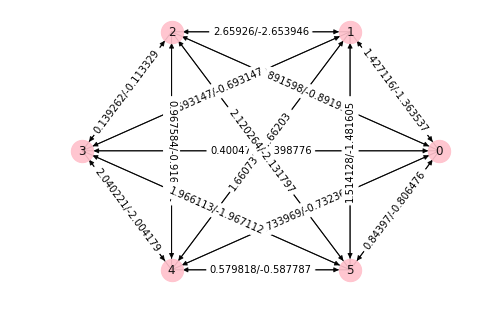

In [5]:
# display log-transformed exchange rate matrix and corresponding graph

Every cycle of **negative length** in the above graph with negative-log-transformed weights is an arbitrage cylce. 

# Identifying Arbitrage Cycles

## Finding an Arbitrage Cycle with Bellman-Ford

One can check if an arbitrage cylce exists and if so, **identify one such a cylce** in the log-transformed graph representation using a slighlty adjusted [Bellman-Ford algorithm](https://en.wikipedia.org/wiki/Bellman-Ford_algorithm) which has a complexity of $\mathcal{O}(|V||E|)$ where $|V|$ denotes the number of vertices and $|E|$ denotes the number of edges. A neat visualization of how the Bellman-Ford algorithm works can be found [here](https://www-m9.ma.tum.de/graph-algorithms/spp-bellman-ford/index_en.html). 

The Bellman-Ford algorithm itself only gives the shortest distance from a prespecified source node to all other nodes in the graph. It needs to be adjusted to:
- show if there is a negative cycle
- to output a negative cycle
- to always find a negative cycle (if there is one) even the graph is not connected

In [6]:
# The Bellman-Ford function used in this notebook
def bf_negative_cycle(G):

    # Remove nan edges
    n = len(G.nodes()) + 1
    edges = [edge for edge in G.edges().data() if ~np.isnan(edge[2]['weight'])]

    # Add a starting node and add edges with zero weight to all other nodes
    start_node_edges = [(n-1, i, {'weight': 0}) for i in range(n-1)]
    edges = edges + start_node_edges

    # Initialize node distances and predecessors
    d = np.ones(n) * np.inf
    d[n - 1] = 0  # Starting node has zero distance
    p = np.ones(n) * -1

    # Relax n times
    for i in range(n):  
        x = -1
        for e in edges:
            if d[int(e[0])] + e[2]['weight'] < d[int(e[1])]:
                d[int(e[1])] = d[int(e[0])] + e[2]['weight']
                p[int(e[1])] = int(e[0])
                x = int(e[1])
        if x == -1:  # If no relaxation possible, no negative cycle
            return None
        
    # Identify negative cycle
    for i in range(n):
        x = p[int(x)]
    cycle = []
    v = x
    while True:
        cycle.append(int(v))
        if v == x and len(cycle) > 1:
            break
        v = p[int(v)]
    return list(reversed(cycle))

At least one arbitrage cycle exists! One such cycle is [1, 0, 5, 2, 1] with cycle length -5.3053 which implies and arbitrage multiplier of 201.4034.


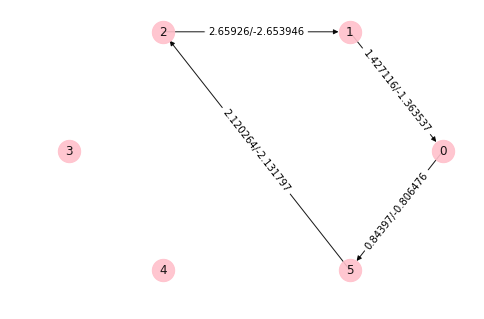

In [7]:
# Check if arbitrage cycle exists using Bellman-Ford. If so, output an arbitrage cycle

## Finding an "Optimal" Set of Cycles 

Identifying the cycle with an arbitrary number of vertices with the **largest** arbitrage multiplier is NP-hard in general. Finding this cycle with many tradable pairs thus quickly becomes computationally infeasible and one has to resort to approximate/heuristic algorithms.

Observe that finding the cycle with the largest multiplier (i.e. the cycle with the most negative cycle length in the graph with negative-log-transformed weights) of all cycles that visit each vertex exactly once is equivalent to the (asymmetric) [Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) - a well known NP-hard problem. The Travelling Salesman Problem (TSP) with $n+1$ cities can be formulated as an integer linear program for a distance matrix $C$ as follows
\begin{align}
\min &\sum_{i=0}^n \sum_{j\ne i,j=0}^nc_{ij}x_{ij} &&  \\
     & 0 \le x_{ij} \le 1  && i,j=0, \cdots, n  \\
     & u_{i} \in \mathbf{Z} && i=0, \cdots, n \\
     & \sum_{i=0,i\ne j}^n x_{ij} = 1 && j=0, \cdots, n \\
     & \sum_{j=0,j\ne i}^n x_{ij} = 1 && i=0, \cdots, n \\
&u_i-u_j +nx_{ij} \le n-1 && 1 \le i \ne j \le n
\end{align}



The TSP is only **NP-hard because we are asking for a single roundtrip solution** that covers all cities / currencies (the last two sets of constraints in the above formulation). But **subtours are fine in the arbitrage finding task** and even skipping some assets completely (a self-cylce) is not a problem! 

If we remove the "no-subtours" constaints of the TSP and also account for the diagonal of $X$ in the objective function, we arrive at the linear programming relaxation of the [assignment problem](https://en.wikipedia.org/wiki/Assignment_problem) 
\begin{align}
\min &\sum_{i=0}^n \sum_{j=0}^nc_{ij}x_{ij} &&  \\
     & 0 \le x_{ij} \le 1  && i,j=0, \cdots, n  \\
     & \sum_{i=0}^n x_{ij} = 1 && j=0, \cdots, n \\
     & \sum_{j=0}^n x_{ij} = 1 && i=0, \cdots, n \\
\end{align}
This linear program always has an integer solution (due to the totally unimodular linear constraint matrix) and thus solves the assignment problem. You can use a very specialized solver for the assignment problem (this notebook uses [this one](https://developers.google.com/optimization/assignment/simple_assignment)  - extremely fast and exact solutions!) or just solve the linear program above - [CVXPY](https://www.cvxpy.org/) makes this very easy. 

In [8]:
# Alternative: Solve Assignment Problem with CVXPY 
X = Variable((len(C_ln),len(C_ln)))
iota = np.ones((len(C_ln),1))

constraints = [X <= 1,
               X >= 0,
               X*iota == 1,
               np.transpose(iota)*X == 1]

# Form objective.
obj = Minimize(sum(multiply(X, C_ln)))

# Form and solve problem.
prob = Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print ("status:", prob.status)
print ("optimal value", prob.value)
X = pd.DataFrame(X.value)
display(X.round(3))

status: optimal
optimal value -5.878853471309778


,0,1,2,3,4,5
0,-0.0,-0.0,-0.0,-0.0,0.0,1.0
1,1.0,-0.0,-0.0,-0.0,0.0,0.0
2,-0.0,1.0,-0.0,0.0,0.0,-0.0
3,0.0,-0.0,1.0,-0.0,0.0,-0.0
4,0.0,0.0,0.0,1.0,-0.0,-0.0
5,0.0,0.0,-0.0,0.0,1.0,-0.0



 Optimal cycle set multiplier (assumes one has enough quantities in every sub-cycle): 357.3828632505597. 
 Multiplier is garuanteed to be at least as large as the multiplier found by Bellman-Ford (201.4034 in this example).


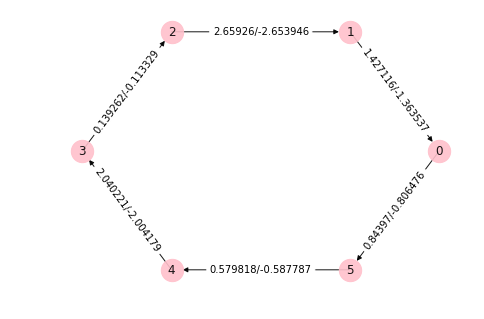

In [9]:
# Find best set of arbitrage cycles by solving the assignment problem
X, total_cost = assignment_solver(C_ln)
if np.sum(np.diag(X)) == len(X):
    print('There is no arbitrage cycle in this graph!')
else:
    # show best set of cycles computed through the assignment problem
    newG, newEdge_labels = remove_edges(G, edge_labels, X)
    draw_my_graph(newG, pos, newEdge_labels)
    print('\n Optimal cycle set multiplier (assumes one has enough quantities in every sub-cycle): ' + str(total_cost) + \
          '. \n Multiplier is garuanteed to be at least as large as the multiplier found by Bellman-Ford (' + str(bf_multi) + ' in this example).')
    
    
# Alternative: Solve Assignment Problem with CVXPY 
#X = Variable((len(C_ln),len(C_ln)))
#iota = np.ones((len(C_ln),1))
#
#constraints = [X <= 1,
#               X >= 0,
#               X*iota == 1,
#               np.transpose(iota)*X == 1]
#
## Form objective.
#obj = Minimize(sum(multiply(X, C_ln)))
#
## Form and solve problem.
#prob = Problem(obj, constraints)
#prob.solve()  # Returns the optimal value.
#print ("status:", prob.status)
#print ("optimal value", prob.value)
#X = pd.DataFrame(X.value)
#display(X)

## Beyond Arbitrage Cycles - Maximize wrt. Quantities (EXPERIMENTAL!)

Assume that we start out with one quantity in each currency. Let us find the set of trades that maximize the quantity in currency $k$ without changing the other quantities. For two matrices $A$ and $B$ of the same dimensions, let $A\circ B$ denote the element-wise product (also denoted [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))). 

Let $C$ denote the exchange rate matrix (not log-transformed) and $Q$ a matrix of the same size as $C$ where the entry $Q_{i,j}$ denotes the number of $i$ coins that flow from currency $i$ to currency $j$. Let $\mathbb{1}$ denote a vector of ones of size $N\times 1$, then vector of outflows from the respective currency inventories is

\begin{align}
\text{outflows} = Q \mathbb{1}.
\end{align}
The vector of inflows (also in currency $i$ units) is

\begin{align}
\text{inflows} = (Q \circ C)' \mathbb{1}
\end{align}
and hence the delta inventory is

\begin{align}
\Delta\! I = (Q \circ C)' \mathbb{1} - Q \mathbb{1}.
\end{align}

Let $I_{init}$ denote the initial inventory the maximizre 

\begin{align}
\max_{Q} \Delta\! I_k  &&  \\
     & \Delta\! I_{\neq k} =0 && \text{| No change in inventory in other assets}\\
     & \Delta\! I_k  \leq 1000 && \text{| Problem would be unbounded in case of arb-cycle}\\ \\
\end{align}

The nice thing about this setup is that it allows to easily incorperate new constraints like the blocksize of the observed quotes. The drawback is that this is numerically extremely challenging!

target                               
              0      1     2     3     4     5
source 0   1.00   0.24  0.41  0.67  0.48  0.43
       1   3.91   1.00  0.07  0.50  0.19  0.22
       2   2.44  14.21  1.00  0.87  0.38  0.12
       3   1.49   2.00  1.12  1.00  0.13  0.14
       4   2.08   5.27  2.50  7.42  1.00  0.56
       5   2.24   4.40  8.43  7.15  1.80  1.00

,inventory_start
currency,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


seconds it took: 0.02523493766784668
status:  optimal
optimal value:  999.983645056918

 Quantities matrix Q:


target                                             
                0        1        2        3        4        5
source 0        0  124.912  110.243  99.7951  63.8694  136.607
       1  226.174        0  35.4031  13.7027  44.6516   106.26
       2  140.966   10.544        0   13.983  39.9886   30.343
       3  100.228  16.7804  36.4426        0  32.5444  25.1863
       4  49.0343  16.1639  5.79265  9.85323        0  13.6013
       5  24.9028  29.0088  15.7591  7.29944  19.9321        0

,inventory_start,inventory_delta,inventory_after_trades
currency,,,
0,1.0,999.983645,1000.983645
1,1.0,0.000013,1.000013
2,1.0,0.000005,1.000005
3,1.0,0.000006,1.000006
4,1.0,-0.000001,0.999999
5,1.0,-0.000002,0.999998


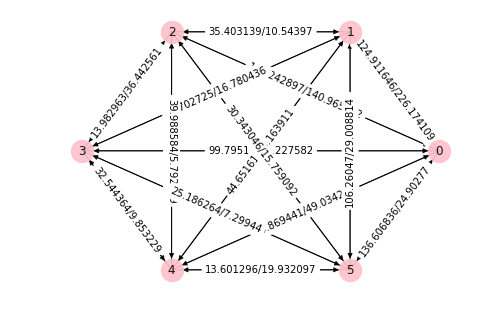

In [10]:
# Maximize inventory

# Live Arbitrage Identification

In this part, we are looking for live arbitrage opportunities on some centralized exchanges. The main tool we use for this is [CCXT](https://github.com/ccxt/ccxt) - an open source JavaScript / Python / PHP cryptocurrency trading library with support for more than 130 crypto exchanges.



The Binance fee structure can be found [here](https://www.binance.com/en/fee/schedule).

In [11]:
# set some parameters
pct_trading_fee = 0.0003
exchange = ccxt.binance()
markets = pd.DataFrame(exchange.load_markets())  # needs to run once after exchange is set

In [12]:
# set things up and create button

Button(description='Find Arbitrage Cycles', style=ButtonStyle())

In [13]:
# create real time exchange rate matrix

Updating all quotes (469 pairs overall) took 0.3411238193511963 seconds.


Bellmann-Ford took 0.1923689842224121 seconds.
At least one arbitrage cycle exists! One such cycle is ['XRP', 'BTC', 'XZC', 'XRP'] with cycle length -0.000385847165173 which implies and arbitrage multiplier of 1.0003859216137656.


Node,0,1,2
Ticker,XRP,BTC,XZC


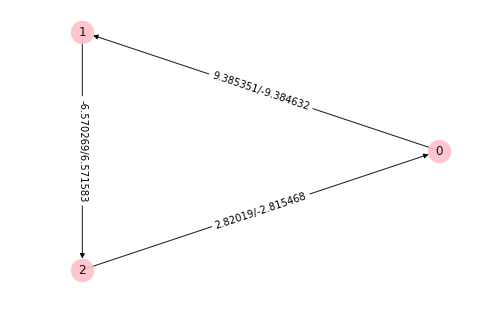

In [14]:
# Check if arbitrage cycle exists using Bellman-Ford. If so, output an arbitrage cycle

Solving assignment problem took 0.05346202850341797 seconds.

 Assignment problem multiplier is 1.0007004473779577.


Node,0,1,2,3,4,5
Ticker,BNB,BTC,BTT,USDT,XRP,XZC


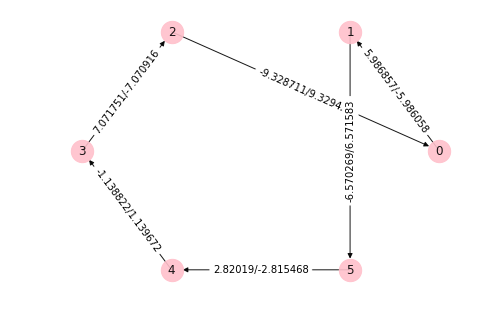

In [15]:
# Find best set of arbitrage cycles by solving the assignment problem 

# Practical Challenges of Arbitrage Trading

Aspects to consider:
* Timing issues
* Costs of inventory (opportunity cost, market risk, custody risk)
* Available liqudity
* Precision of quantities
* Order cancelations
* ...